<a href="https://colab.research.google.com/github/riotrip/ml-smt5/blob/main/TG1_2_3_JS09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rio Tri Prayogo - 2341720236 - TI 3F/25**
---
## **JS09 - Regresi**

### Tugas Praktikum

**Instruksi Umum:**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.
7. Ulagi langkah 4 dengan menggunakan model SVR. Anda dapat bereksperimen dengan dengan melakukan hyperparameter tunning.

**Catatan Tambahan**

- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PembelajaranMesin_Rio/docs/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Deskripsi Dataset

In [3]:
print(f"Shape: {df.shape}")

Shape: (1338, 7)


Variabel Bebas:
* age: Usia penerima asuransi (numerik, 18-64 tahun)
* sex: Jenis kelamin (kategorikal: male/female)
* bmi: Body Mass Index (numerik, ukuran lemak tubuh)
* children: Jumlah anak yang ditanggung (numerik, 0-5)
* smoker: Status merokok (kategorikal: yes/no)
* region: Wilayah tempat tinggal (kategorikal: northeast, northwest, southeast, southwest)

Variabel Target:
* charges: Biaya medis personal (numerik, dalam dollar)

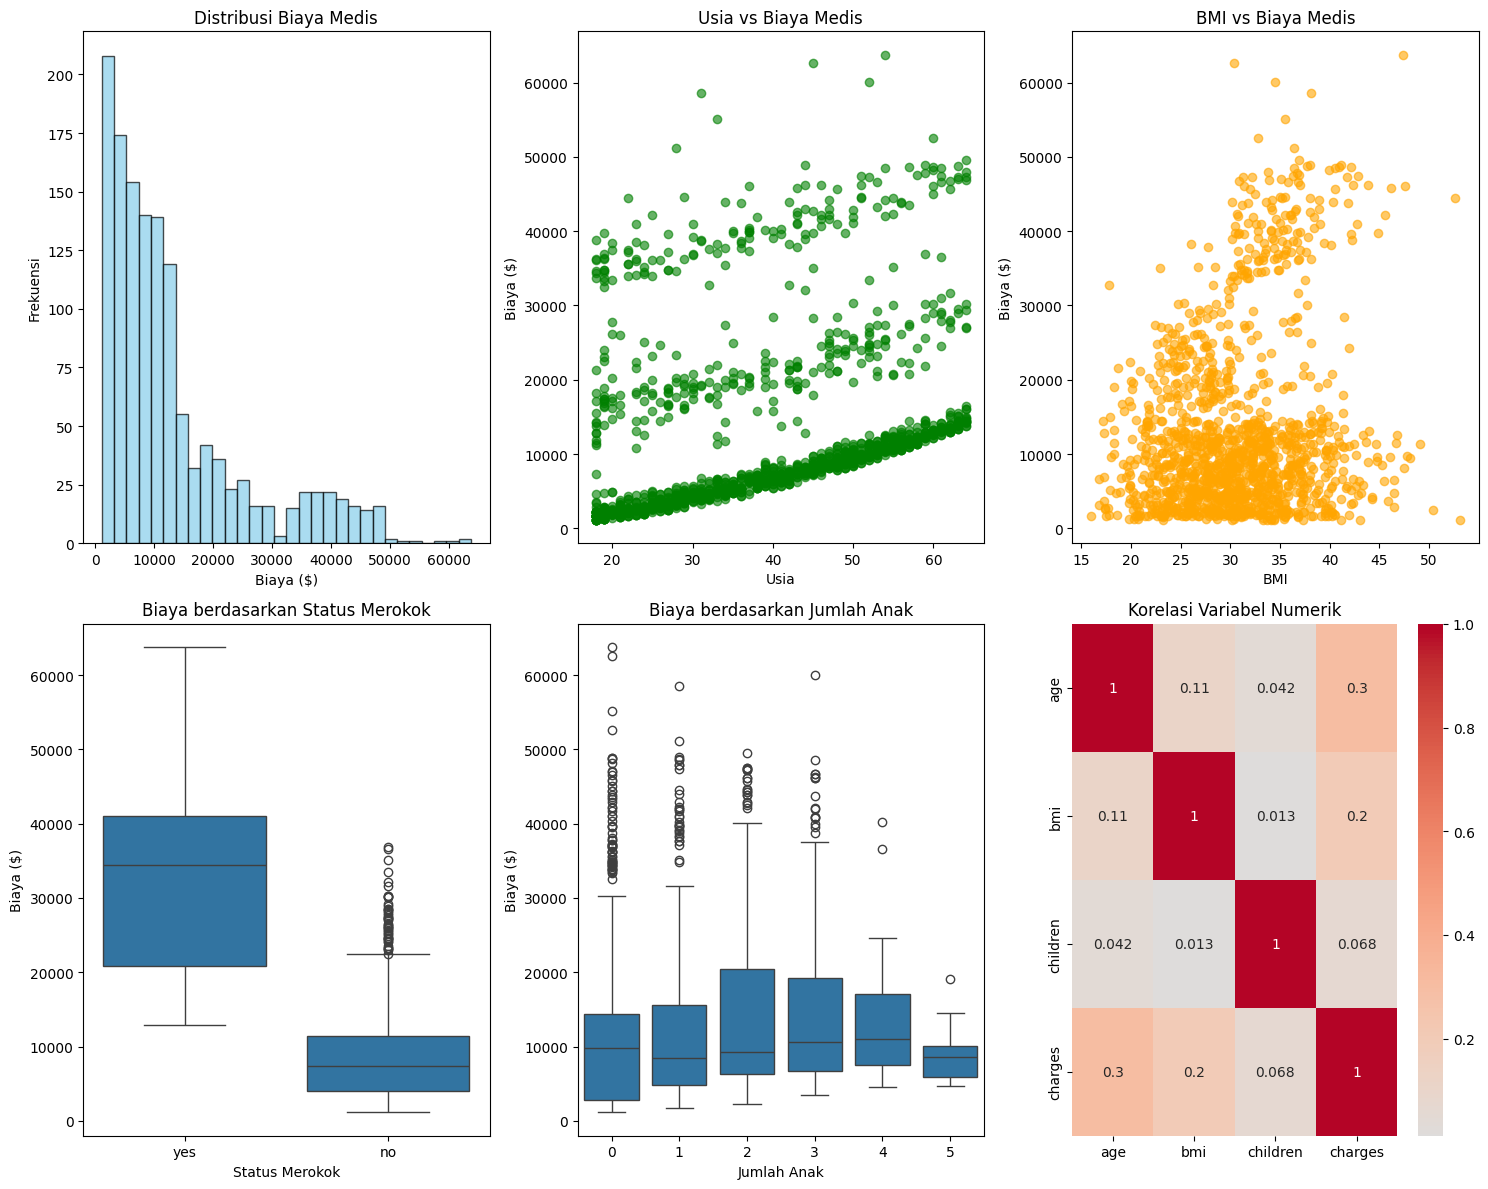

In [4]:
# Visualisasi distribusi dan hubungan variabel
plt.figure(figsize=(15, 12))

# 1. Distribusi biaya medis
plt.subplot(2, 3, 1)
plt.hist(df['charges'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribusi Biaya Medis')
plt.xlabel('Biaya ($)')
plt.ylabel('Frekuensi')

# 2. Hubungan usia dengan biaya
plt.subplot(2, 3, 2)
plt.scatter(df['age'], df['charges'], alpha=0.6, color='green')
plt.title('Usia vs Biaya Medis')
plt.xlabel('Usia')
plt.ylabel('Biaya ($)')

# 3. Hubungan BMI dengan biaya
plt.subplot(2, 3, 3)
plt.scatter(df['bmi'], df['charges'], alpha=0.6, color='orange')
plt.title('BMI vs Biaya Medis')
plt.xlabel('BMI')
plt.ylabel('Biaya ($)')

# 4. Pengaruh status merokok
plt.subplot(2, 3, 4)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Biaya berdasarkan Status Merokok')
plt.xlabel('Status Merokok')
plt.ylabel('Biaya ($)')

# 5. Pengaruh jumlah anak
plt.subplot(2, 3, 5)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Biaya berdasarkan Jumlah Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Biaya ($)')

# 6. Heatmap korelasi
plt.subplot(2, 3, 6)
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Variabel Numerik')

plt.tight_layout()
plt.show()

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [5]:
X = df.drop('charges', axis=1)  # Variabel bebas
y = df['charges']              # Variabel target
print(f"Variabel bebas: {X.columns.tolist()}")
print(f"Variabel target: charges")

# Encode variabel kategorikal
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

Variabel bebas: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
Variabel target: charges


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data latih: {X_train.shape[0]} sampel")
print(f"Data uji: {X_test.shape[0]} sampel")

Data latih: 1070 sampel
Data uji: 268 sampel


3. Lakukan feature scaling jika diperlukan.

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [8]:
lr_model = LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [9]:
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [10]:
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"R-squared: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")

R-squared: 0.7833
MSE: 33635210.43
MAE: 4186.51


7. Ulagi langkah 4 dengan menggunakan model SVR. Anda dapat bereksperimen dengan dengan melakukan hyperparameter tunning.

In [11]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf', 'linear']
}

svr_model = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
svr_model.fit(X_train_scaled, y_train)

print(f"Best parameters: {svr_model.best_params_}")

y_pred_svr = svr_model.predict(X_test_scaled)

r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"R-squared: {r2_svr:.4f}")
print(f"MSE: {mse_svr:.2f}")
print(f"MAE: {mae_svr:.2f}")

Best parameters: {'C': 100, 'epsilon': 1, 'kernel': 'linear'}
R-squared: 0.6510
MSE: 54180722.76
MAE: 3569.76


In [13]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR (Tuned)'],
    'R-squared': [r2_lr, r2_svr],
    'MSE': [mse_lr, mse_svr],
    'MAE': [mae_lr, mae_svr]
})
print(results.round(4))

               Model  R-squared           MSE        MAE
0  Linear Regression     0.7833  3.363521e+07  4186.5089
1        SVR (Tuned)     0.6510  5.418072e+07  3569.7565


Berdasarkan praktikum diatas, dapat disimpulkan bahwasanya Linear Regression memiliki peforma yang lebih unggul dibanding SVR dalam dataset insurance. Dapat dilihat dari nilai R-squared Linear Regression yang lebih tinggi dibandingkan SVR. Meskipun SVR memiliki MAE yang sedikit lebih rendah. Hasil ini menunjukkan bahwa untuk dataset asuransi kesehatan ini, hubungan antara fitur dan target cenderung lebih linear, sehingga model yang lebih sederhana seperti Linear Regression justru memberikan prediksi yang lebih akurat dan stabil.